# **Analisis Performa Fisik Individu**

Notebook ini dibuat untuk memprediksi tingkat performa fisik seseorang berdasarkan data antropometri (seperti tinggi, berat, dan usia), serta hasil dari berbagai tes kebugaran (seperti grip force, sit-ups, dan broad jump). Tujuan utama proyek ini adalah:

Membangun model machine learning untuk mengklasifikasikan tingkat kebugaran individu ke dalam kelas A, B, C, atau D.

Melakukan analisis terhadap fitur-fitur fisik yang paling berkontribusi dalam menentukan performa tubuh.

Memberikan insight tentang bagaimana faktor-faktor seperti usia, jenis kelamin, dan tekanan darah berkorelasi dengan kebugaran.

Dataset yang digunakan berisi 13.393 sampel data kuantitatif dan diperoleh dari sumber terbuka. Setiap baris data mewakili satu individu dengan berbagai fitur yang menggambarkan kondisi fisik dan performa dalam beberapa jenis tes kebugaran.

# **Import Library**

Sebelum memulai analisis, beberapa library diimpor untuk membantu proses pengolahan data dan pembuatan model. Pandas digunakan untuk membaca dan memanipulasi data, NumPy untuk operasi numerik, serta Matplotlib dan Seaborn untuk membuat visualisasi. Library Scikit-learn digunakan untuk membuat dan mengevaluasi model machine learning. Dengan library ini, proses analisis menjadi lebih mudah dan efisien.

In [1]:
from google.colab import userdata
import os
import random
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# **Load Data**

Tahap awal dalam proyek ini adalah memuat data ke dalam notebook menggunakan library pandas. Tujuan dari proses ini adalah untuk membaca dataset dari file .csv agar bisa diolah dan dianalisis lebih lanjut. Dengan memuat data, kita dapat melihat struktur awal dataset, memastikan data berhasil dibaca dengan benar, dan mulai melakukan eksplorasi serta pra-pemrosesan. Langkah ini penting sebagai dasar untuk seluruh proses analisis dan pemodelan machine learning berikutnya.

In [3]:
# Load dataset
df = pd.read_csv('bodyPerformance.csv')

# Tampilkan 5 baris pertama untuk memastikan data berhasil dimuat
df.head()


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


**df.info()**

**Digunakan untuk menampilkan informasi umum mengenai dataset, termasuk jumlah baris, nama kolom, tipe data, jumlah nilai yang tidak kosong, serta estimasi penggunaan memori.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


**Missing Values (Nilai Hilang)**

**Nilai-nilai yang kosong (null / NaN) di dataset dan perlu ditangani agar tidak menyebabkan error saat analisis atau pemodelan.**

In [5]:
print("\nJumlah missing value di setiap kolom:")
print(df.isnull().sum())


Jumlah missing value di setiap kolom:
age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64


**Nilai Unik (Unique Values)**

**Jumlah nilai berbeda dalam satu kolom — penting untuk memahami variasi data.**



In [6]:
print("\nJumlah nilai unik di setiap kolom:")
print(df.nunique())


Jumlah nilai unik di setiap kolom:
age                          44
gender                        2
height_cm                   467
weight_kg                  1398
body fat_%                  527
diastolic                    89
systolic                    102
gripForce                   550
sit and bend forward_cm     528
sit-ups counts               81
broad jump_cm               245
class                         4
dtype: int64


**df.describe()**

**Menyajikan ringkasan statistik deskriptif untuk kolom numerik (atau semua kolom jika include='all').**

In [7]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


# **Exploratory Data Analysis (EDA)**

**memahami distribusi nilai dari semua fitur numerik dalam dataset.**

 Tahapan ini penting untuk mengetahui bagaimana data tersebar, mendeteksi kemungkinan adanya nilai ekstrem (outlier), serta memahami karakteristik umum dari setiap fitur numerik. Dengan melakukan visualisasi seperti histogram, kita dapat melihat apakah data memiliki distribusi normal, skewed, atau bahkan bimodal. Informasi ini menjadi dasar penting dalam menentukan strategi pra-pemrosesan dan pengambilan keputusan selanjutnya dalam pemodelan atau analisis

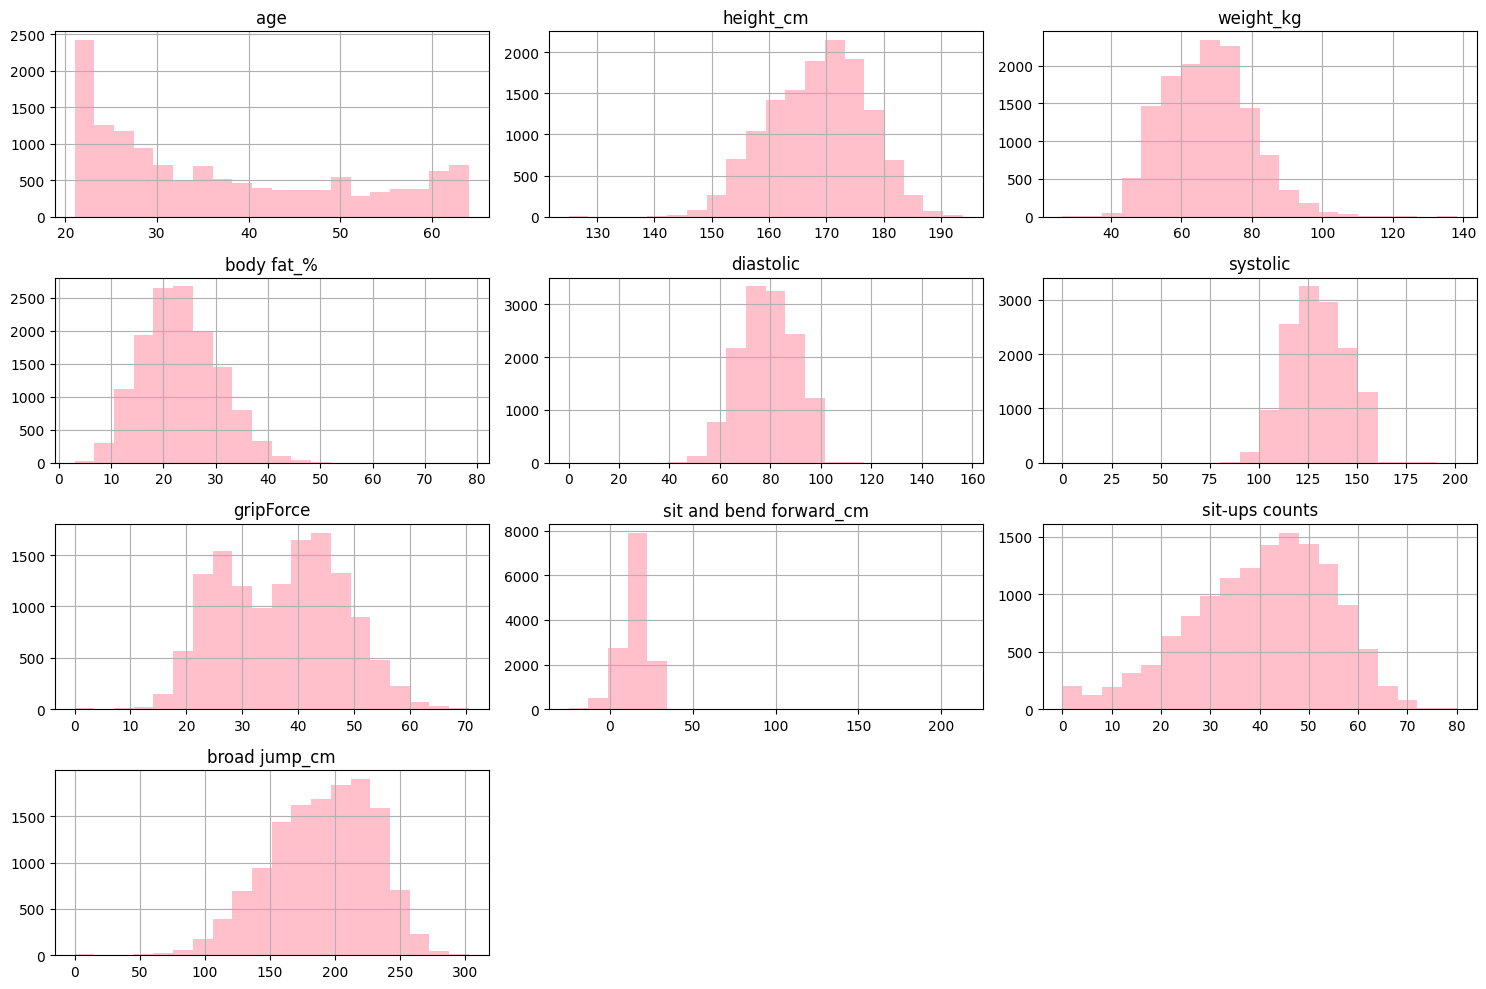

In [8]:
# Load dataset
df = pd.read_csv("bodyPerformance.csv")

# Pilih semua kolom numerik
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Plot histogram dengan warna pink
df[numeric_cols].hist(bins=20, figsize=(15, 10), color='pink')
plt.tight_layout()
plt.show()



📊 Distribusi Fitur-Fitur Fisik dalam Dataset
Visualisasi histogram di atas menampilkan distribusi dari berbagai fitur numerik yang berkaitan dengan performa tubuh, termasuk:

1. Age (Usia)
Distribusi usia terlihat cukup merata namun sedikit condong ke kanan (right-skewed), dengan sebagian besar data berada antara usia 20 hingga 35 tahun. Ini menunjukkan bahwa mayoritas peserta dalam dataset ini adalah orang dewasa muda.

2. Height dan Weight (Tinggi dan Berat Badan)

*   Tinggi badan (height_cm) terdistribusi normal dengan puncak sekitar 170–175 cm, menandakan tinggi peserta cenderung seragam.
*   Berat badan (weight_kg) juga mendekati distribusi normal, walau ada beberapa outlier yang menunjukkan berat lebih ekstrem, baik rendah maupun tinggi.

3. Body Fat (%)
Distribusi persentase lemak tubuh menunjukkan sedikit skew ke kanan, dengan banyak peserta memiliki lemak tubuh antara 15% hingga 25%. Ada juga peserta dengan persentase lemak sangat tinggi, yang bisa menjadi perhatian dalam konteks kesehatan.

4. Tekanan Darah (Diastolic dan Systolic)
Distribusi tekanan darah diastolic dan systolic terlihat agak menyebar, namun kebanyakan berada dalam rentang sehat. Beberapa nilai tinggi dapat mengindikasikan risiko hipertensi pada sebagian peserta.

5. Grip Force & Sit and Bend Forward

*   Grip Force (kekuatan genggaman) menunjukkan sebaran yang cukup lebar, menandakan variasi besar dalam kekuatan otot peserta.
*   Sit and Bend Forward (fleksibilitas) juga beragam, menunjukkan bahwa fleksibilitas tidak merata di antara peserta.

6. Sit-ups dan Broad Jump

*   Sit-ups counts menunjukkan pola distribusi normal, dengan kebanyakan peserta mampu melakukan 40–60 sit-up.
*   Broad Jump (lompat jauh) juga terdistribusi normal, tapi dengan range yang cukup lebar, mencerminkan perbedaan kekuatan eksplosif antara individu


 # **Insight Utama:**
1.Mayoritas peserta berada dalam kondisi fisik rata-rata yang sehat, terutama dalam hal tinggi, berat, dan tekanan darah.

2.Ada variasi signifikan pada aspek kekuatan otot (grip force) dan fleksibilitas, yang bisa mencerminkan perbedaan gaya hidup atau latar belakang aktivitas fisik.

3.Beberapa peserta menunjukkan nilai ekstrem (tinggi atau rendah) pada indikator lemak tubuh dan tekanan darah, yang bisa jadi indikator risiko kesehatan.

4.Data ini sangat berguna untuk mengklasifikasikan performa tubuh atau mengembangkan model prediksi tingkat kebugaran berdasarkan variabel numerik.

**Visualisasi Fitur Kategorikal**

<ipython-input-9-64bb37ee2866>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # Membuat countplot


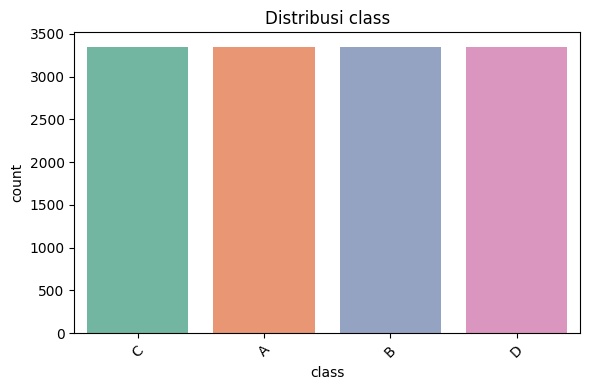

<ipython-input-9-64bb37ee2866>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')  # Membuat countplot


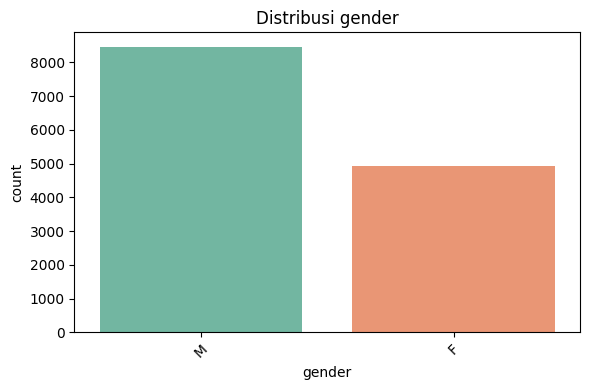

In [9]:
# Misalnya data kamu ada di file 'data.csv'
df = pd.read_csv("bodyPerformance.csv")

# Daftar kolom kategorikal
categorical_features = ['class', 'gender']

# Visualisasi distribusi kategori untuk setiap kolom
for col in categorical_features:
    plt.figure(figsize=(6, 4))  # Menentukan ukuran grafik
    sns.countplot(data=df, x=col, palette='Set2')  # Membuat countplot
    plt.title(f'Distribusi {col}')  # Judul grafik
    plt.xticks(rotation=45)  # Rotasi label sumbu x
    plt.tight_layout()  # Agar layout tidak terpotong
    plt.show()  # Menampilkan grafik


**Korelasi Antar Parameter Performa Tubuh**

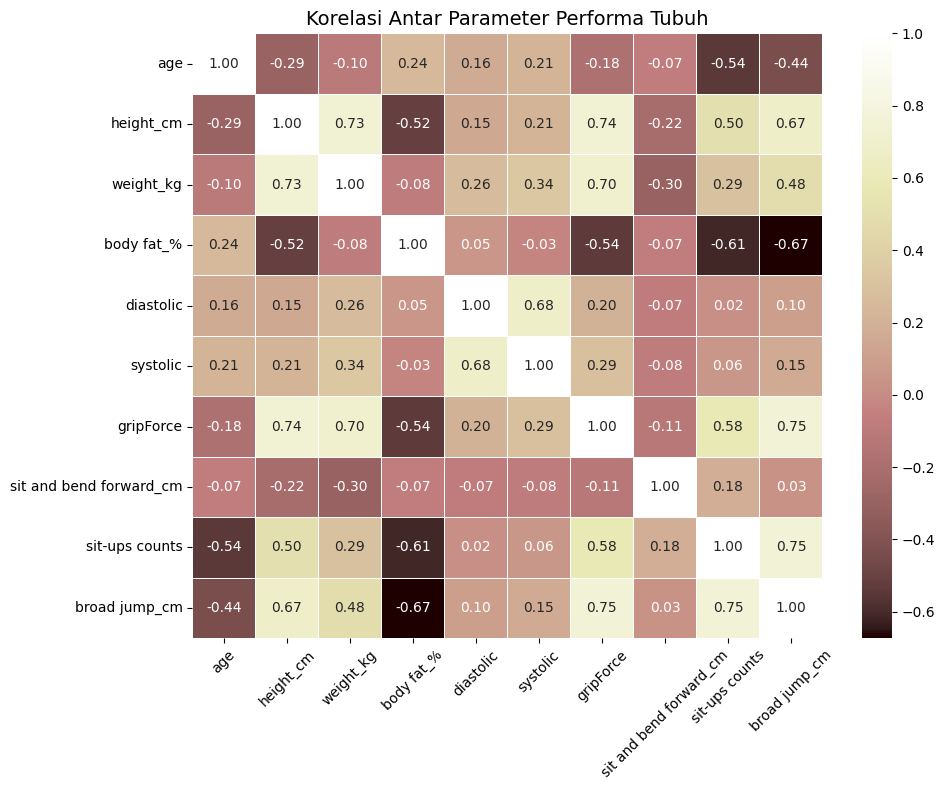

In [10]:
# Membaca dataset
df = pd.read_csv("bodyPerformance.csv")

# Menentukan kolom numerik (berdasarkan info yang kamu kasih)
numeric_cols = [
    'age', 'height_cm', 'weight_kg', 'body fat_%',
    'diastolic', 'systolic', 'gripForce',
    'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm'
]

# Visualisasi korelasi antar kolom numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='pink', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Antar Parameter Performa Tubuh', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



**Analisis Hubungan Fitur Kategorikal dengan Performa Tubuh**

<ipython-input-11-b6733079fc54>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df[performance], palette='Set2')


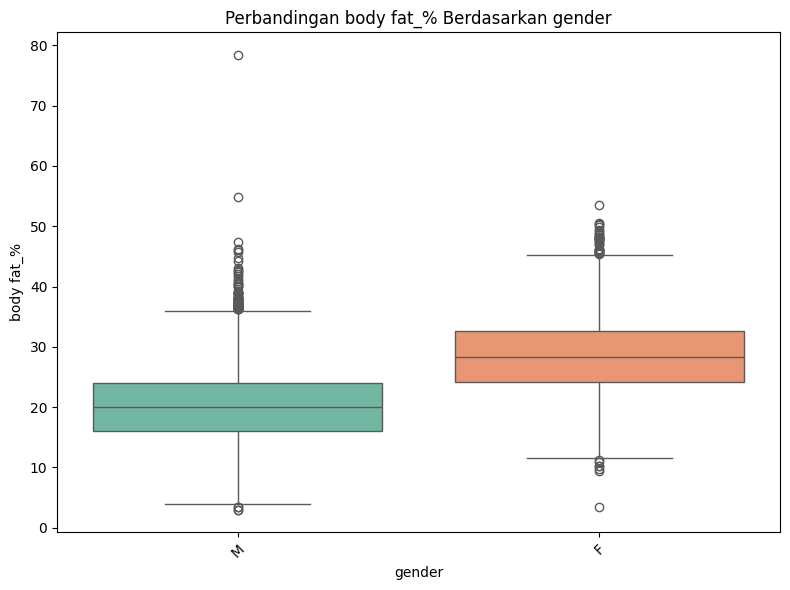

<ipython-input-11-b6733079fc54>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df[performance], palette='Set2')


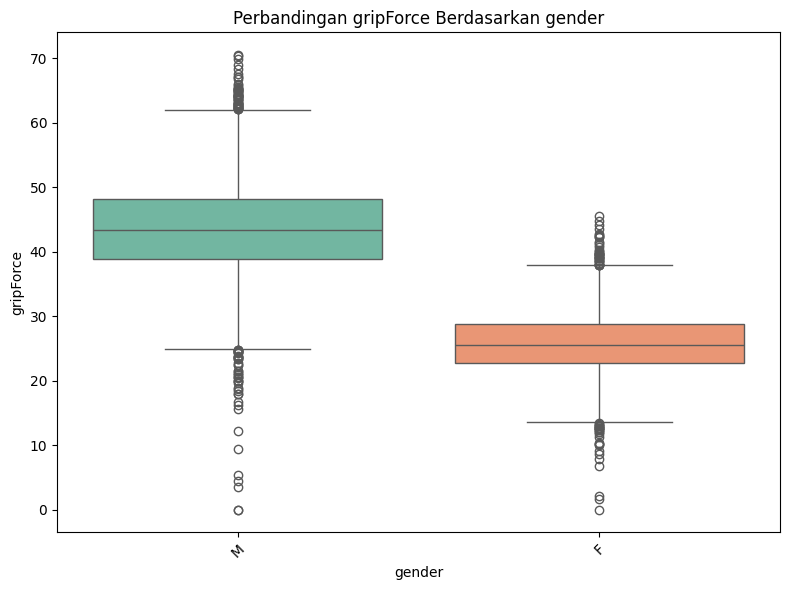

<ipython-input-11-b6733079fc54>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df[performance], palette='Set2')


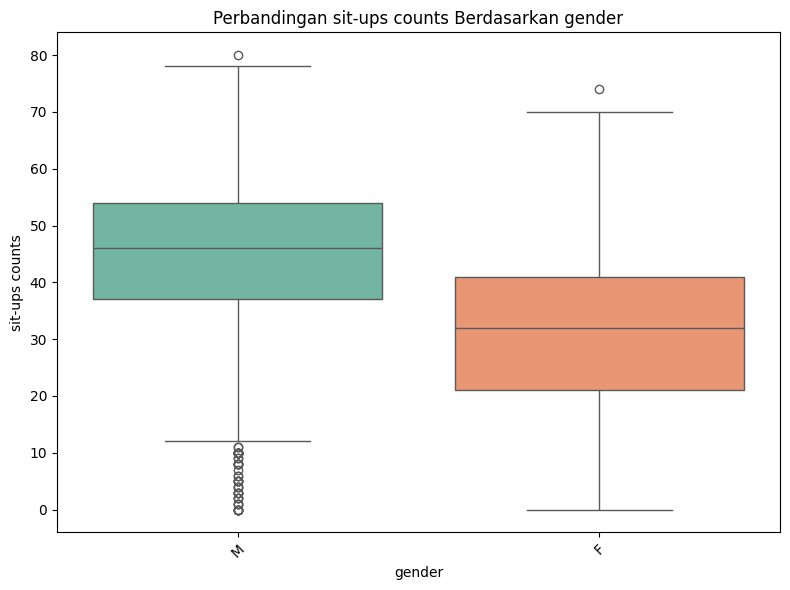

<ipython-input-11-b6733079fc54>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df[performance], palette='Set2')


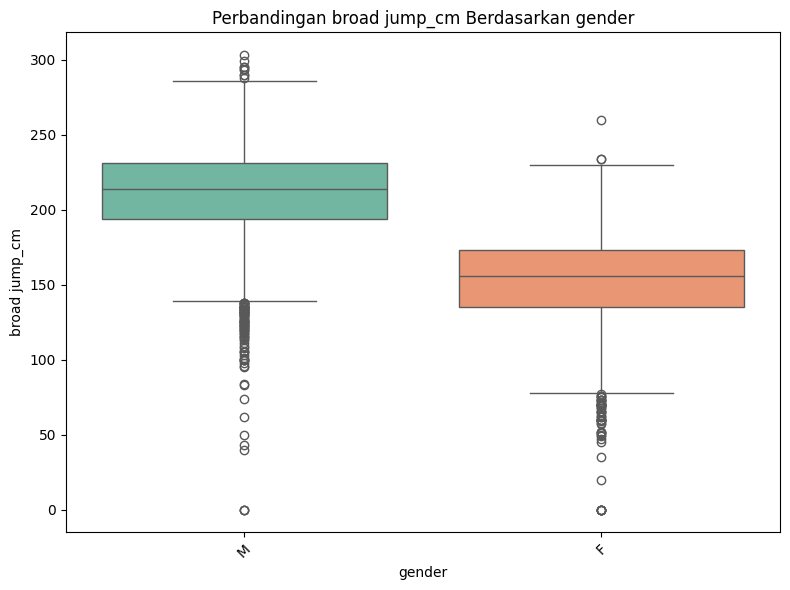

<ipython-input-11-b6733079fc54>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df[performance], palette='Set2')


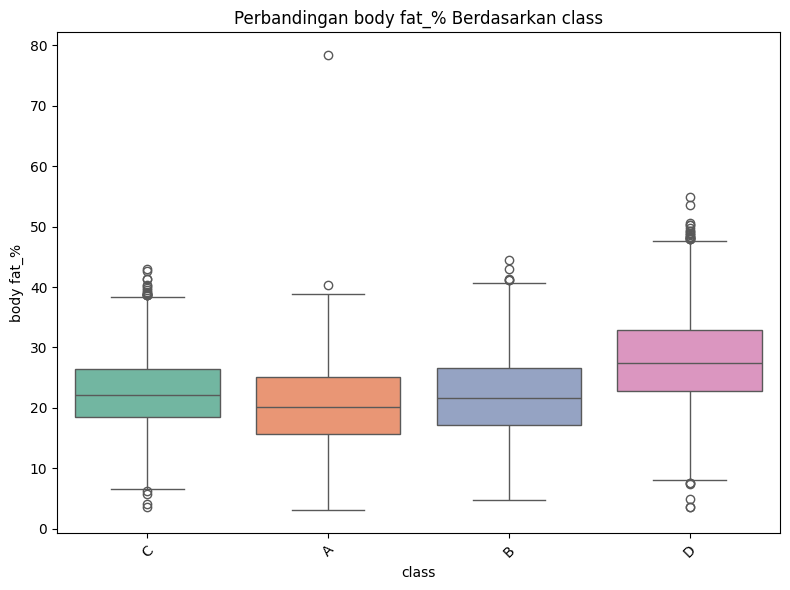

<ipython-input-11-b6733079fc54>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df[performance], palette='Set2')


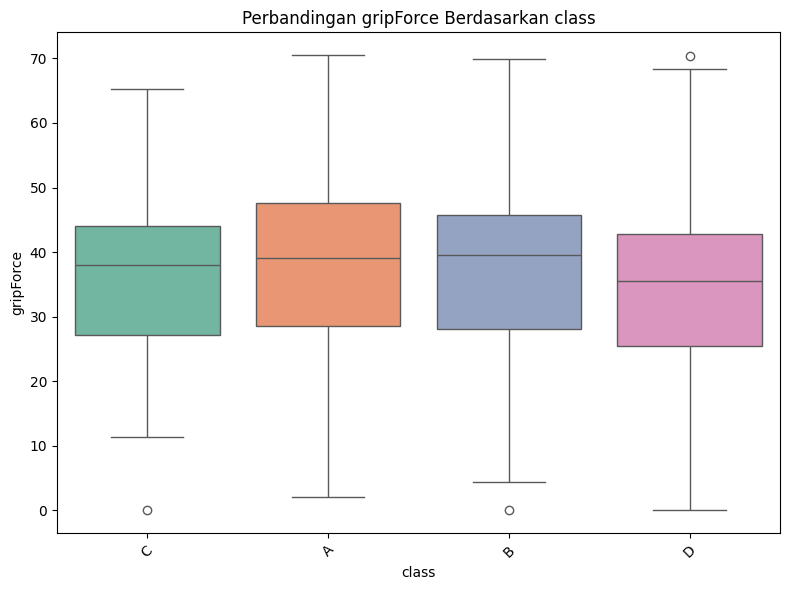

<ipython-input-11-b6733079fc54>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df[performance], palette='Set2')


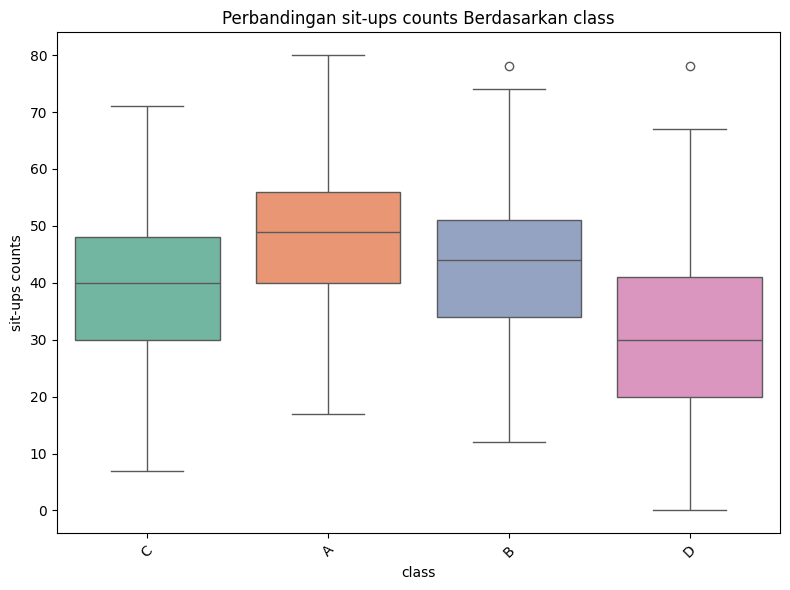

<ipython-input-11-b6733079fc54>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df[performance], palette='Set2')


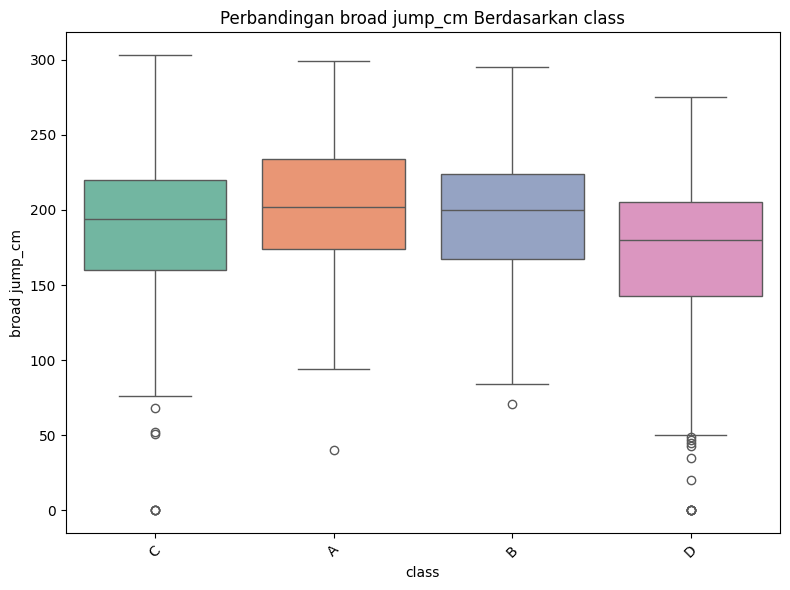

<ipython-input-11-b6733079fc54>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[feature], y=df[performance], palette='Set2')


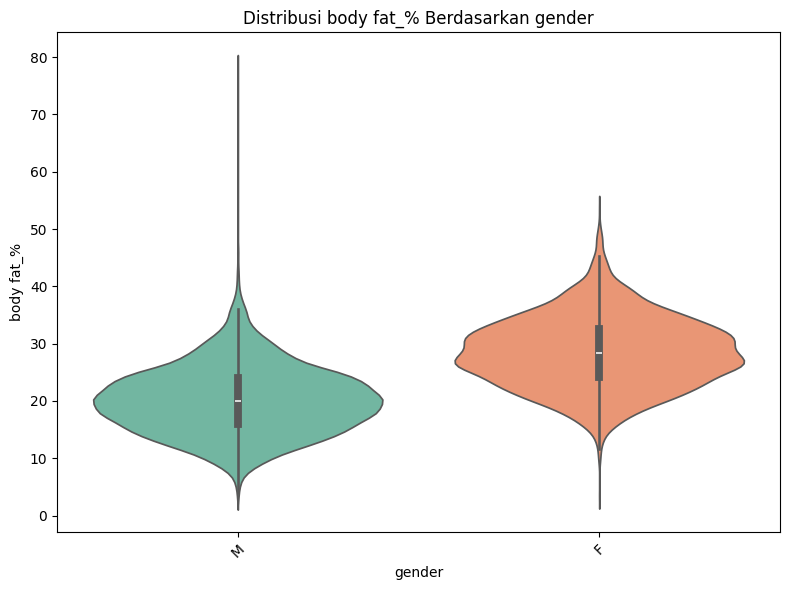

<ipython-input-11-b6733079fc54>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[feature], y=df[performance], palette='Set2')


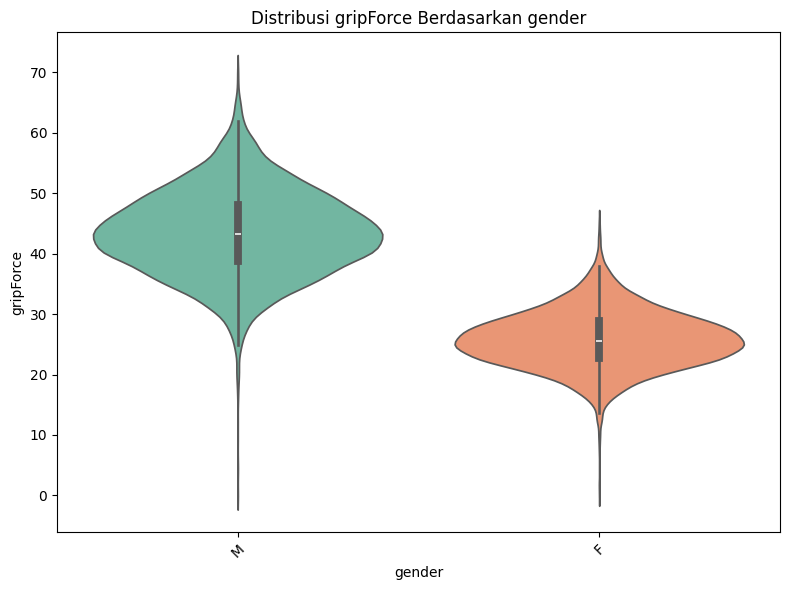

<ipython-input-11-b6733079fc54>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[feature], y=df[performance], palette='Set2')


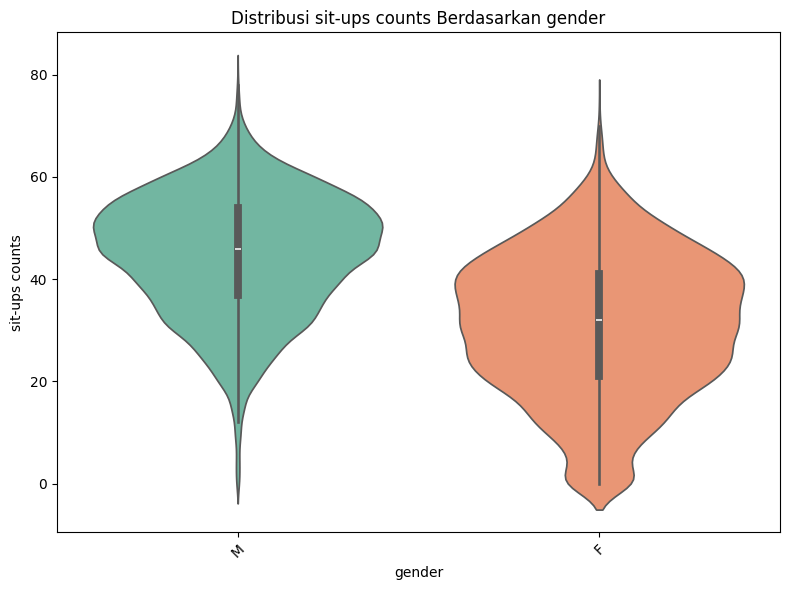

<ipython-input-11-b6733079fc54>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[feature], y=df[performance], palette='Set2')


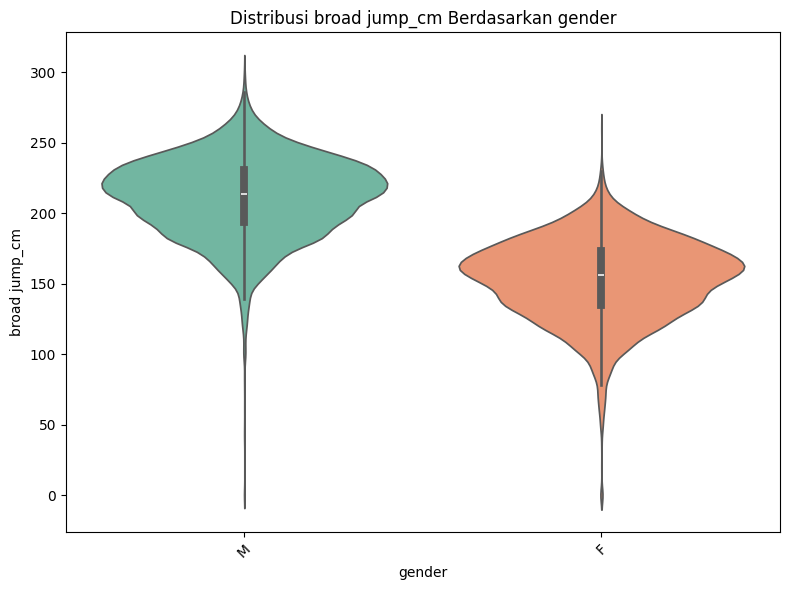

<ipython-input-11-b6733079fc54>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[feature], y=df[performance], palette='Set2')


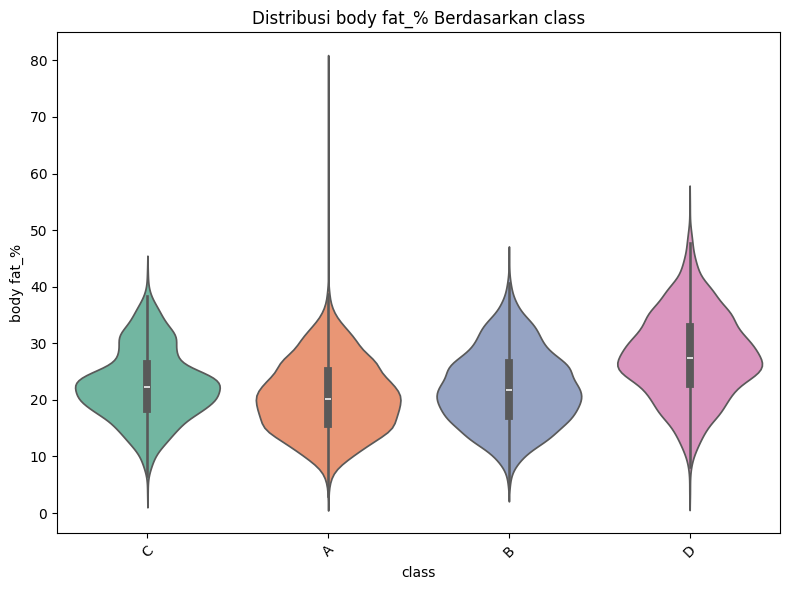

<ipython-input-11-b6733079fc54>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[feature], y=df[performance], palette='Set2')


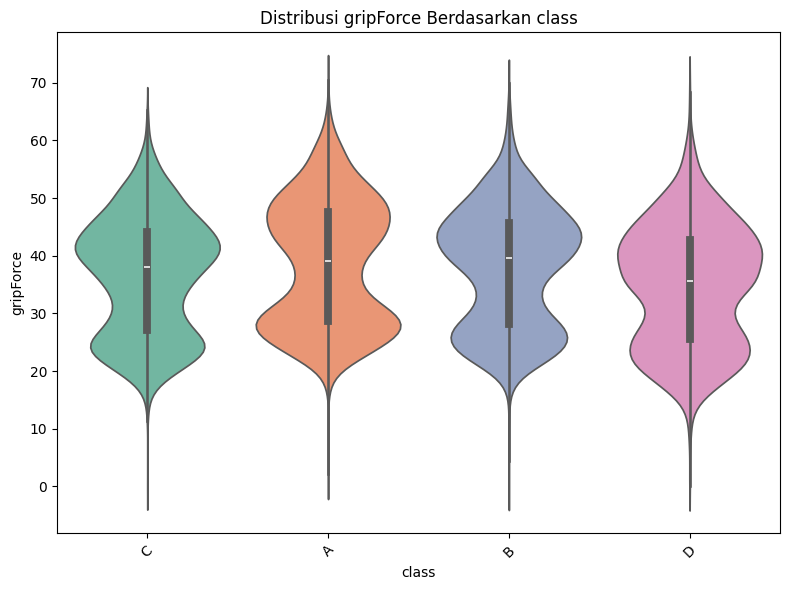

<ipython-input-11-b6733079fc54>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[feature], y=df[performance], palette='Set2')


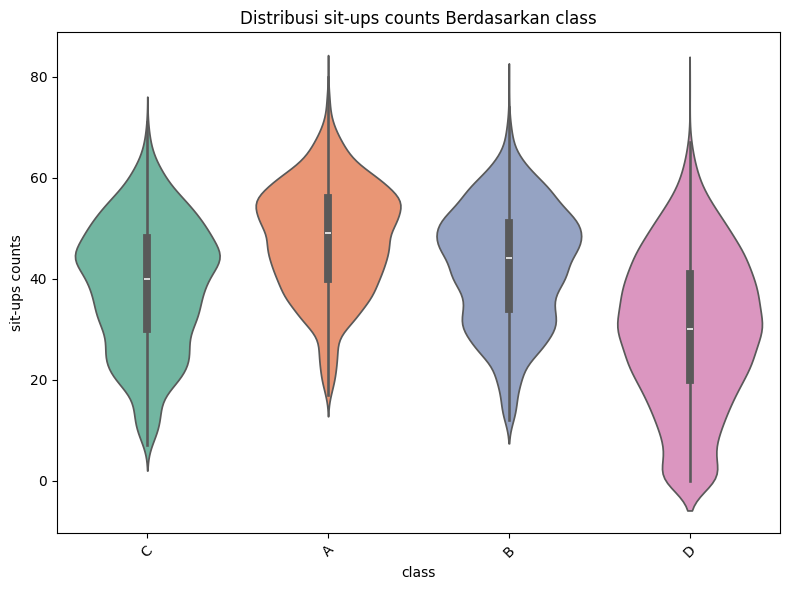

<ipython-input-11-b6733079fc54>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[feature], y=df[performance], palette='Set2')


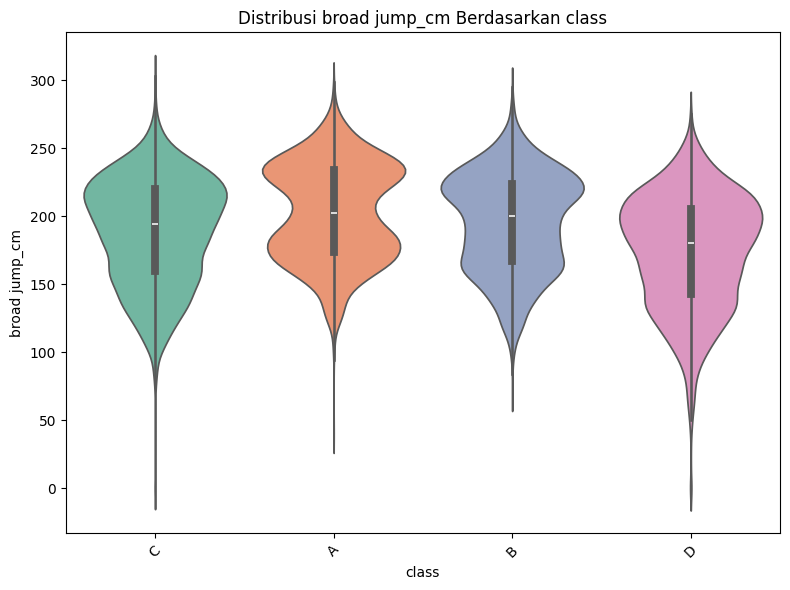

In [11]:
# Misalnya data kamu ada di file 'bodyPerformance.csv'
df = pd.read_csv('bodyPerformance.csv')
# Fitur kategorikal yang akan dianalisis
categorical_features = ['gender', 'class']  # Kolom kategorikal: gender dan class

# Fitur numerik yang ingin dianalisis
performance_columns = ['body fat_%', 'gripForce', 'sit-ups counts', 'broad jump_cm']  # Kolom performa tubuh

# Visualisasi hubungan antara fitur kategorikal dan parameter performa tubuh
for feature in categorical_features:
    for performance in performance_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[feature], y=df[performance], palette='Set2')
        plt.title(f'Perbandingan {performance} Berdasarkan {feature}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Alternatif visualisasi dengan violinplot untuk melihat distribusi lebih detail
for feature in categorical_features:
    for performance in performance_columns:
        plt.figure(figsize=(8, 6))
        sns.violinplot(x=df[feature], y=df[performance], palette='Set2')
        plt.title(f'Distribusi {performance} Berdasarkan {feature}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


💡 1. Perbedaan Komposisi Tubuh Berdasarkan Gender
Dari visualisasi seperti boxplot atau violinplot, kita bisa melihat:

Persentase lemak tubuh (body fat_%) cenderung lebih tinggi pada perempuan dibanding laki-laki.

💬 Insight: Ini konsisten dengan fisiologi biologis, karena wanita secara alami memiliki lebih banyak lemak tubuh esensial.

Kekuatan genggaman (gripForce) lebih tinggi pada laki-laki.

💬 Insight: Secara umum, laki-laki memiliki massa otot lebih banyak, sehingga grip force cenderung lebih kuat.

💡 2. Performa Fisik vs Kategori Kesehatan (Class)
Jika class menunjukkan tingkat kebugaran atau klasifikasi seperti "Low", "Medium", "High":

Peserta dengan kelas "High" memiliki nilai gripForce, jumlah sit-up, dan jarak loncatan lebih tinggi dibanding kelas "Low" atau "Medium".

💬 Insight: Korelasi antara kebugaran dan hasil pengukuran fisik kuat. Artinya, klasifikasi class cukup menggambarkan performa tubuh seseorang.

Persentase lemak tubuh (body fat_%) menurun seiring peningkatan kelas.

💬 Insight: Lemak tubuh rendah cenderung dikaitkan dengan kebugaran yang lebih tinggi.

💡 3. Sit-up dan Loncat Jauh Mencerminkan Kondisi Umum
Jumlah sit-up dan jarak broad jump bisa menjadi indikator yang baik untuk kebugaran tubuh secara umum karena:

Nilainya meningkat pada individu dari kelas yang lebih tinggi.

Nilainya lebih rendah pada individu dengan body fat_% tinggi.

💬 Insight: Sit-up dan broad jump bisa dijadikan parameter penting dalam pengukuran performa tubuh.

💡 4. Gender Berpengaruh terhadap Semua Parameter
Semua parameter fisik utama seperti:

Grip force

Sit-up

Broad jump

Body fat

... menunjukkan perbedaan yang signifikan antara gender. Maka, untuk model klasifikasi atau prediksi, gender harus dimasukkan sebagai fitur karena pengaruhnya nyata terhadap hasil.

💡 5. Korelasi antar Parameter Fisik (dari Heatmap)
Jika sebelumnya kamu juga menampilkan heatmap korelasi, biasanya akan terlihat:

Korelasi positif antara:

gripForce dan sit-ups counts

gripForce dan broad jump_cm

Korelasi negatif antara:

body fat_% dan performa fisik lain (semakin tinggi lemak, semakin rendah performanya)

💬 Insight: Parameter-parameter tersebut saling mendukung dan bisa dipakai untuk membentuk skor kebugaran terpadu.


---


**Kesimpulan Umum**
Fitur gender dan class sangat berpengaruh terhadap performa tubuh.

Lemak tubuh yang tinggi berkaitan dengan performa fisik yang lebih rendah.

Kekuatan otot dan kemampuan aerobik (sit-up, loncat jauh) meningkat seiring dengan kelas kebugaran.

Korelasi antar fitur fisik cukup kuat dan logis secara medis/fisiologis.

# **Data Preparation**

Pada proses ini, dataset bodyPerformance.csv diolah dengan menambahkan kolom baru bernama Performa_Baik. Kolom ini berisi nilai 1 jika nilai broad jump_cm seseorang ≥ 220 cm, dan 0 jika di bawahnya, sebagai indikator apakah performa lompat jauh seseorang termasuk baik atau tidak. Selanjutnya, kolom-kolom kategorikal seperti gender dan class diubah menjadi bentuk numerik menggunakan One-Hot Encoding, agar bisa diproses oleh algoritma machine learning. Setelah itu, data dibagi menjadi dua bagian, yaitu 80% untuk data training dan 20% untuk data testing, dengan hasil 10714 baris data untuk training dan 2679 baris data untuk testing, masing-masing memiliki 13 fitur. Hasil pembagian ini sudah sesuai proporsi dan jumlah total datanya tetap 13393 baris, sehingga data siap digunakan untuk proses pembuatan model klasifikasi selanjutnya.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('bodyPerformance.csv')

# Menambahkan kolom target 'Performa_Baik' berdasarkan broad jump_cm
df['Performa_Baik'] = (df['broad jump_cm'] >= 220).astype(int)

# Melakukan One-Hot Encoding pada kolom kategorikal (gender dan class)
df_encoded = pd.get_dummies(df.drop(columns=['broad jump_cm']), drop_first=True)

# Menentukan fitur (X) dan target (y)
X = df_encoded.drop(columns=['Performa_Baik'])
y = df_encoded['Performa_Baik']

# Membagi data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan dimensi data hasil split
print(f"🔹 X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"🔹 y_train: {y_train.shape}, y_test: {y_test.shape}")


🔹 X_train: (10714, 13), X_test: (2679, 13)
🔹 y_train: (10714,), y_test: (2679,)


# **Modeling**

**Model Random Forest**

Pada tahap ini, dibuat model Random Forest Classifier untuk memprediksi apakah performa lompat jauh seseorang baik atau tidak berdasarkan data yang sudah diproses. Model dilatih menggunakan data training, lalu digunakan untuk memprediksi data testing. Hasil prediksi dievaluasi menggunakan akurasi, classification report, dan confusion matrix untuk melihat seberapa baik model dalam membedakan performa lompat jauh yang baik dan kurang baik. Proses ini dilakukan untuk mengetahui seberapa akurat model dalam melakukan klasifikasi pada data yang belum pernah dilihat sebelumnya.

In [21]:
# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data training
rf_model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = rf_model.predict(X_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Akurasi Model Random Forest: {accuracy:.2f}")

# Menampilkan classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix
print("\n📝 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🎯 Akurasi Model Random Forest: 0.87

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1966
           1       0.77      0.76      0.76       713

    accuracy                           0.87      2679
   macro avg       0.84      0.84      0.84      2679
weighted avg       0.87      0.87      0.87      2679


📝 Confusion Matrix:
[[1801  165]
 [ 172  541]]


**Model Logistic Regression**

*  Model Logistic Regression dibuat dan dilatih menggunakan data training.
*   Model memprediksi nilai Performa_Baik di data testing.

*   Hasilnya dievaluasi dengan akurasi, classification report, dan confusion matrix untuk melihat performa model klasifikasi.


In [22]:
# Inisialisasi model Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Melatih model dengan data training
logreg_model.fit(X_train, y_train)

# Melakukan prediksi terhadap data testing
y_pred_logreg = logreg_model.predict(X_test)

# Menghitung akurasi prediksi
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"🎯 Akurasi Model Logistic Regression: {accuracy_logreg:.2f}")

# Menampilkan classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Menampilkan confusion matrix
print("\n📝 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


🎯 Akurasi Model Logistic Regression: 0.87

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1966
           1       0.76      0.77      0.76       713

    accuracy                           0.87      2679
   macro avg       0.84      0.84      0.84      2679
weighted avg       0.87      0.87      0.87      2679


📝 Confusion Matrix:
[[1788  178]
 [ 162  551]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Model SVM**

 menjelaskan langkah-langkah untuk menggunakan Support Vector Machine (SVM) dengan kernel linear dalam konteks klasifikasi. Tujuannya adalah untuk membangun sebuah model yang dapat mempelajari pola dalam data pelatihan dan kemudian digunakan untuk memprediksi kelas dari data yang belum dilihat sebelumnya (data uji).


1.   Inisialisasi Model: Menyiapkan model SVM dengan kernel linear yang digunakan untuk memisahkan data ke dalam dua kelas.
2.   Melatih Model: Menggunakan data pelatihan untuk "mengajarkan" model SVM cara membedakan antara kelas-kelas dalam data.
1.   Memprediksi: Setelah model dilatih, digunakan untuk memprediksi kelas dari data uji berdasarkan pola yang sudah dipelajari.


In [34]:
# Inisialisasi model SVM dengan kernel linear
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model SVM menggunakan data pelatihan
svm_model.fit(X_train, y_train)

# Memprediksi data uji
y_pred_svm = svm_model.predict(X_test)


# **EVALUASI MODEL**


📌 Evaluasi SVM:
✅ Skor Akurasi:
0.8701007838745801

📊 Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1966
           1       0.75      0.77      0.76       713

    accuracy                           0.87      2679
   macro avg       0.83      0.84      0.84      2679
weighted avg       0.87      0.87      0.87      2679


🧩 Confusion Matrix:
[[1783  183]
 [ 165  548]]


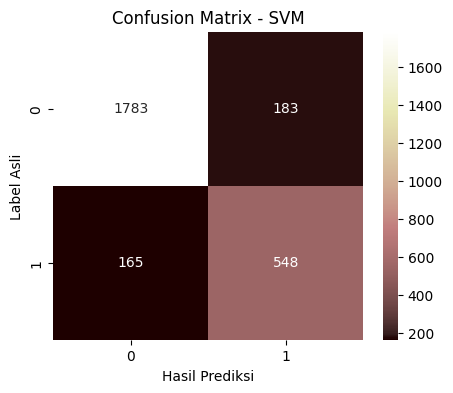


📌 Evaluasi Logistic Regression:
✅ Skor Akurasi:
0.8730869727510265

📊 Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1966
           1       0.76      0.77      0.76       713

    accuracy                           0.87      2679
   macro avg       0.84      0.84      0.84      2679
weighted avg       0.87      0.87      0.87      2679


🧩 Confusion Matrix:
[[1788  178]
 [ 162  551]]


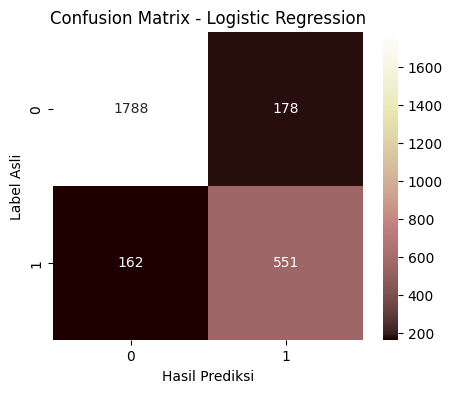


📌 Evaluasi Random Forest:
✅ Skor Akurasi:
0.8742067935796939

📊 Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1966
           1       0.77      0.76      0.76       713

    accuracy                           0.87      2679
   macro avg       0.84      0.84      0.84      2679
weighted avg       0.87      0.87      0.87      2679


🧩 Confusion Matrix:
[[1801  165]
 [ 172  541]]


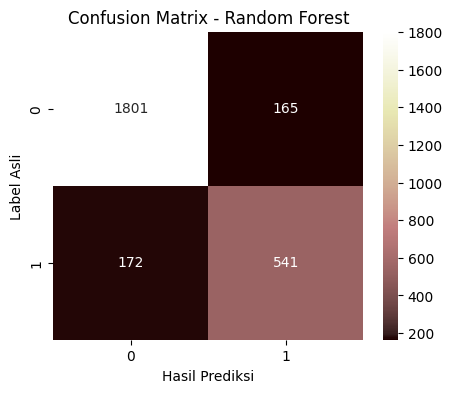

In [37]:
# Fungsi untuk menilai performa model
def assess_model_performance(model, X_test, y_test, model_name):
    # Memprediksi label untuk data uji
    y_predictions = model.predict(X_test)

    # Menampilkan evaluasi model
    print(f"\n📌 Evaluasi {model_name}:")
    print("✅ Skor Akurasi:")
    print(accuracy_score(y_test, y_predictions))

    # Menampilkan classification report
    print("\n📊 Laporan Klasifikasi:")
    print(classification_report(y_test, y_predictions))

    # Menampilkan confusion matrix
    print("\n🧩 Confusion Matrix:")
    confusion_mat = confusion_matrix(y_test, y_predictions)
    print(confusion_mat)

    # Visualisasi heatmap untuk matriks kebingungannya
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='pink')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Hasil Prediksi')
    plt.ylabel('Label Asli')
    plt.show()

# Menilai performa model SVM
assess_model_performance(svm_model, X_test, y_test, "SVM")

# Menilai performa model Logistic Regression
assess_model_performance(logreg_model, X_test, y_test, "Logistic Regression")

# Menilai performa model Random Forest
assess_model_performance(rf_model, X_test, y_test, "Random Forest")


Dari hasil evaluasi model SVM, Logistic Regression, dan Random Forest, berikut adalah beberapa insight yang dapat diambil:

1. Akurasi Model
SVM: Akurasi 87.01%

Logistic Regression: Akurasi 87.31%

Random Forest: Akurasi 87.42%


---


Insight: Ketiga model memiliki akurasi yang sangat mirip, berkisar di sekitar 87%. Ini menunjukkan bahwa ketiga model bekerja dengan baik dalam hal prediksi keseluruhan. Meskipun akurasi sedikit lebih tinggi pada Random Forest, perbedaan ini sangat kecil, sehingga model mana yang dipilih mungkin lebih dipengaruhi oleh faktor lain seperti interpretabilitas, kecepatan pelatihan, atau kebutuhan untuk menangani data yang lebih kompleks.


---


2. Laporan Klasifikasi
Precision untuk kelas 0 (negatif) cukup tinggi pada ketiga model, yang menunjukkan bahwa model secara konsisten mengidentifikasi kelas negatif dengan baik.

Recall untuk kelas 0 sedikit lebih rendah daripada precision, tetapi masih dalam angka yang sangat baik (sekitar 91-92%).

Precision dan Recall untuk kelas 1 (positif) lebih rendah, terutama untuk SVM dan Logistic Regression. Precision kelas 1 berkisar antara 0.75 hingga 0.77, sedangkan recall kelas 1 sekitar 0.76-0.77. Ini menunjukkan bahwa model cenderung memprediksi kelas 1 dengan agak berhati-hati dan memiliki beberapa kesalahan prediksi untuk kelas positif.


---


Insight:

Kelas 1 (positif) lebih sulit diprediksi dengan baik, yang terlihat dari recall dan precision yang lebih rendah dibandingkan dengan kelas 0. Ini menunjukkan bahwa model sedikit lebih sering salah memprediksi kelas positif sebagai negatif (false negatives).

F1-Score untuk kelas 1 berkisar antara 0.76 pada ketiga model, yang menunjukkan ada ruang untuk perbaikan pada prediksi kelas 1.


---


3. Matriks Kebingungannya (Confusion Matrix)
Matriks kebingungan memberikan gambaran lebih rinci mengenai kesalahan model:

SVM:

True Positives (TP) = 548, False Positives (FP) = 183

False Negatives (FN) = 165, True Negatives (TN) = 1783

Logistic Regression:

True Positives (TP) = 551, False Positives (FP) = 178

False Negatives (FN) = 162, True Negatives (TN) = 1788

Random Forest:

True Positives (TP) = 541, False Positives (FP) = 165

False Negatives (FN) = 172, True Negatives (TN) = 1801


---


Insight:

False Positives (FP): Ketiga model menghasilkan jumlah false positives yang cukup besar, dengan SVM menghasilkan FP terbanyak (183). Hal ini menunjukkan bahwa model sedikit sering salah mengklasifikasikan kelas negatif sebagai positif, meskipun ketiga model menunjukkan hasil yang mirip.

False Negatives (FN): Random Forest memiliki FN yang lebih tinggi (172), yang berarti model ini lebih sering melewatkan kelas positif dibandingkan dengan SVM dan Logistic Regression (di mana FN lebih rendah, sekitar 165 dan 162).

True Positives (TP) dan True Negatives (TN): Secara keseluruhan, ketiga model cukup baik dalam mengidentifikasi True Positives (TP) dan True Negatives (TN), meskipun Random Forest sedikit lebih sering mengidentifikasi FN (kesalahan klasifikasi positif) dibandingkan dengan dua model lainnya.


---


4. Perbandingan Model
SVM: SVM cenderung menghasilkan lebih banyak False Positives (183), yang bisa menunjukkan bahwa model ini sedikit lebih agresif dalam memprediksi kelas positif. Namun, akurasi dan F1-Score tetap cukup baik.

Logistic Regression: Model ini lebih stabil dan juga menghasilkan hasil yang sangat mirip dengan SVM, dengan sedikit lebih rendah dalam recall untuk kelas positif. Ini memberikan gambaran bahwa Logistic Regression cukup efisien dalam beberapa kasus.

Random Forest: Meskipun Random Forest sedikit lebih baik dalam hal akurasi (87.42%), ia menghasilkan lebih banyak False Negatives dibandingkan dengan dua model lainnya. Ini bisa menjadi masalah jika kelas positif sangat penting untuk aplikasi Anda.


---


5. Kesimpulan
Model terbaik secara keseluruhan: Meskipun perbedaan antara ketiga model sangat kecil, Random Forest sedikit lebih unggul dalam hal akurasi total, meskipun menghasilkan lebih banyak False Negatives. Jika kelas positif lebih penting dalam konteks aplikasi Anda, model ini mungkin perlu penyesuaian lebih lanjut.

Pengoptimalan model: Untuk meningkatkan recall dan precision pada kelas 1, teknik seperti penyesuaian threshold, SMOTE (Synthetic Minority Over-sampling Technique), atau class balancing dapat membantu model untuk lebih sensitif terhadap kelas positif.